# Train a model on the MNIST digit dataset

First, let's import everything we need : 

In [1]:
from MLModule.utils import get_data_from_csv
from MLModule.model import NeuralNetwork
from MLModule.display import plot_cost_history
from MLModule.utils import reduce_dataset, print_confusion_matrix

Now, we need the dataset that we train on. For that, you can download it here : https://www.kaggle.com/datasets/nietzs96/mnist-5k

And put this csv file in the data folder.

In [2]:
DATA_PATH = "data/mnist1.5k.csv"

#We parse the csv into 2 variables. the Xs are the input data (here, the value of each pixel of each images)
# and the ys are the expected output for each images.
full_Xs, full_ys = get_data_from_csv(DATA_PATH, header=True)

In [3]:
#Now we choose a name for the model. It will be use to store the model into a file after training it.
MODEL_NAME = "mnist1.5k_64_16"

In [4]:
#Here, we create the model by giving him the correct values so he can train on the dataset
hidden_layers = [64, 16]
model = NeuralNetwork(
    nb_input=len(full_Xs[0]),
    hidden_layers=hidden_layers,
    nb_output=len(full_ys[0]),
    name=MODEL_NAME
    )

#This PATH variable will be use to store the model after a training
PATH = "model/"+MODEL_NAME+".pkl"

#For this boolean : true means we store the cost after each training in a file, false means we don't
keeping_track_cost = True


Weights loaded successfully.


Below, we create a training function. This can be use many times in order to train our model. 

In [5]:
def training_model(model : NeuralNetwork, full_Xs: list[list[float]], full_ys: list[list[float]], nb_training = 10, mini_batch_proportion=0.1, learning_rate=0.01, random_node_pass_rate=0.0):

    nb_to_print = nb_training // 10
    cost = None if not keeping_track_cost else 0
    for i in range(nb_training):
        #mini-batch technique, to avoid overfitting and to reduce time for each training
        Xs, ys = reduce_dataset(full_Xs, full_ys, mini_batch_proportion)
        
        cost = model.learn(Xs, ys, learning_rate, keeping_track_cost, random_node_pass_rate)
        if (i+1)%(nb_to_print) == 0 :
            print(f"training {i+1} / {nb_training} completed")
            print(f"Cost : {cost}\n" if cost is not None else f"Not keeping track of the cost during the training\n")
    
    model.save_weights(path=PATH)


In [6]:
#To train the model, run again and again this block of code

nb_training = 500                   # number of training
mini_batch_proportion = 0.8         # Proportion of the full dataset we train to
learning_rate = 0.001               # How much we change the weights
random_node_pass_rate = 0.0         # Proportion of weights we don't touch after a training

training_model(model, full_Xs, full_ys, nb_training, mini_batch_proportion, learning_rate, random_node_pass_rate)

training 50 / 500 completed
Cost : 0.5988751168138337

training 100 / 500 completed
Cost : 0.6009285931012804

training 150 / 500 completed
Cost : 0.599605579097034

training 200 / 500 completed
Cost : 0.5989509219838464

training 250 / 500 completed
Cost : 0.5971882742923496

training 300 / 500 completed
Cost : 0.5970175360373724

training 350 / 500 completed
Cost : 0.6010862579582191

training 400 / 500 completed
Cost : 0.5925358383837201

training 450 / 500 completed
Cost : 0.5982745342772595

training 500 / 500 completed
Cost : 0.5976059958379846



#### Results : 

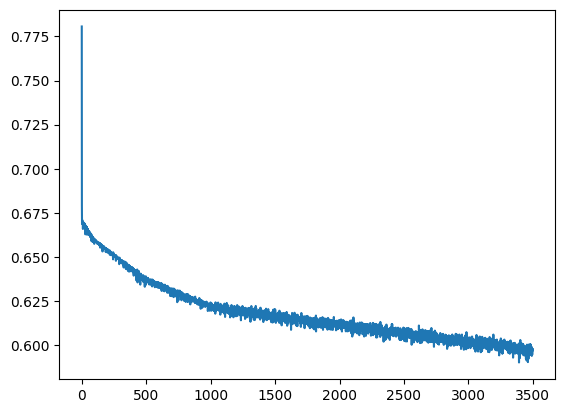

Expected (---) / Predicted (|||)
[50, 0, 0]
[8, 3, 39]
[0, 0, 50]
0 : 100.0 %
1 : 6.0 %
2 : 100.0 %
Overall accuracy : 68.67 %


In [8]:
#After any training, we can see the model's progression

plot_cost_history(MODEL_NAME)
print_confusion_matrix(model, full_Xs, full_ys)